# Sentience Models Calculations


### Import Data from Simulations

In [1]:
import os
import pickle
import copy 
import collections
import warnings
import csv
import platform
import test_simulations
import squigglepy as sq

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from logging import warning
from operator import concat
from struct import unpack
from IPython.display import display

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (18.5 * 0.65, 10.5 * 0.65)

SCENARIO_RANGES = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 95, 99]

params = pickle.load(open(os.path.join('input_data', "Sentience Parameters.p"), 'rb'))
NUM_SCENARIOS = params['N_SCENARIOS']
HC_WEIGHT = params['HC_WEIGHT']
WEIGHT_NOS = params['WEIGHT_NOS']

SPECIES = ['bees', 'cockroaches', 'fruit_flies', 'ants', \
            'c_elegans', 'crabs', 'crayfish', 'earthworms', \
            'sea_hares', 'spiders', 'octopuses', 'chickens', \
            'cows', 'sometimes_operates', 'bsf', \
            'carp', 'salmon', 'silkworms', 'pigs']

# import simulated scores
bee_scores = pickle.load(open('{}_simulated_scores.p'.format(os.path.join('output_data', "sent_bees")), 'rb'))
cockroach_scores = pickle.load(open('{}_simulated_scores.p'.format(os.path.join('output_data', "sent_cockroaches")), 'rb'))
fruit_fly_scores = pickle.load(open('{}_simulated_scores.p'.format(os.path.join('output_data', "sent_fruit_flies")), 'rb'))
ants_scores = pickle.load(open('{}_simulated_scores.p'.format(os.path.join('output_data', "sent_ants")), 'rb'))
c_elegans_scores = pickle.load(open('{}_simulated_scores.p'.format(os.path.join('output_data', "sent_c_elegans")), 'rb'))
crab_scores = pickle.load(open('{}_simulated_scores.p'.format(os.path.join('output_data', "sent_crabs")), 'rb'))
crayfish_scores = pickle.load(open('{}_simulated_scores.p'.format(os.path.join('output_data', "sent_crayfish")), 'rb'))
carp_scores = pickle.load(open('{}_simulated_scores.p'.format(os.path.join('output_data', "sent_carp")), 'rb'))
earthworm_scores = pickle.load(open('{}_simulated_scores.p'.format(os.path.join('output_data', "sent_earthworms")), 'rb'))
sea_hare_scores = pickle.load(open('{}_simulated_scores.p'.format(os.path.join('output_data', "sent_sea_hares")), 'rb'))
spiders_scores = pickle.load(open('{}_simulated_scores.p'.format(os.path.join('output_data', "sent_spiders")), 'rb'))
octopus_scores = pickle.load(open('{}_simulated_scores.p'.format(os.path.join('output_data', "sent_octopuses")), 'rb'))
chicken_scores = pickle.load(open('{}_simulated_scores.p'.format(os.path.join('output_data', "sent_chickens")), 'rb'))
cow_scores = pickle.load(open('{}_simulated_scores.p'.format(os.path.join('output_data', "sent_cows")), 'rb'))
sometimes_operates_scores = pickle.load(open('{}_simulated_scores.p'.format(os.path.join('output_data', "sent_sometimes_operates")), 'rb'))
bsf_scores = pickle.load(open('{}_simulated_scores.p'.format(os.path.join('output_data', "sent_bsf")), 'rb'))
salmon_scores = pickle.load(open('{}_simulated_scores.p'.format(os.path.join('output_data', "sent_salmon")), 'rb'))
silkworm_scores = pickle.load(open('{}_simulated_scores.p'.format(os.path.join('output_data', "sent_silkworms")), 'rb'))
pig_scores = pickle.load(open('{}_simulated_scores.p'.format(os.path.join('output_data', "sent_pigs")), 'rb'))

unknown_probabilities = pickle.load(open(os.path.join('input_data', "Sentience Unknown Probabilities.p"), 'rb'))

def run_cmd(cmd):
    print(cmd)
    os.system(cmd)

if platform.system() == 'Darwin' or platform.system() == 'Linux':
    run_cmd('rm -rf sentience_estimates')
    run_cmd('mkdir sentience_estimates')
elif platform.system() == 'Windows':
    run_cmd('rmdir /Q /S sentience_estimates')
    run_cmd('mkdir sentience_estimates')
else:
    raise ValueError('Platform `{}` not supported'.format(platform.system()))

data = {'bees': {'Scores': bee_scores, 'Unknown Prob': unknown_probabilities['bees']}, 
        'cockroaches': {'Scores': cockroach_scores, 'Unknown Prob': unknown_probabilities['cockroaches']}, 
        'fruit_flies': {'Scores': fruit_fly_scores, 'Unknown Prob': unknown_probabilities['fruit_flies']}, 
        'ants': {'Scores': ants_scores, 'Unknown Prob': unknown_probabilities['ants']},
        'c_elegans': {'Scores': c_elegans_scores, 'Unknown Prob': unknown_probabilities['c_elegans']}, 
        'crabs': {'Scores': crab_scores, 'Unknown Prob': unknown_probabilities['crabs']}, 
        'crayfish': {'Scores': crayfish_scores, 'Unknown Prob': unknown_probabilities['crayfish']}, 
        'earthworms': {'Scores': earthworm_scores, 'Unknown Prob': unknown_probabilities['earthworms']},
        'sea_hares': {'Scores': sea_hare_scores, 'Unknown Prob': unknown_probabilities['sea_hares']}, 
        'spiders': {'Scores': spiders_scores, 'Unknown Prob': unknown_probabilities['spiders']},
        'octopuses': {'Scores': octopus_scores, 'Unknown Prob': unknown_probabilities['octopuses']},
        'chickens': {'Scores': chicken_scores, 'Unknown Prob': unknown_probabilities['chickens']},
        'cows': {'Scores': cow_scores, 'Unknown Prob': unknown_probabilities['cows']},
        'sometimes_operates': {'Scores': sometimes_operates_scores, 'Unknown Prob': unknown_probabilities['sometimes_operates']},
        'bsf': {'Scores': bsf_scores, 'Unknown Prob': unknown_probabilities['bsf']},
        'carp': {'Scores': carp_scores, 'Unknown Prob': unknown_probabilities['carp']},
        'salmon': {'Scores': salmon_scores, 'Unknown Prob': unknown_probabilities['salmon']},
        'silkworms': {'Scores': silkworm_scores, 'Unknown Prob': unknown_probabilities['silkworms']},
        'pigs': {'Scores': pig_scores, 'Unknown Prob': unknown_probabilities['pigs']},
        }

print("### Testing to make sure score generation works ###")
test_simulations.test_sentience_scores(data, HC_WEIGHT, SPECIES)


rm -rf sentience_estimates
mkdir sentience_estimates
### Testing to make sure score generation works ###
All proxies with zero/one probabilities have scores equal to their expected values
Number proxies whose proportion was outside 95% CI: 28
Proportion of total proxies whose mean score was outside of the 95% CI: 0.052
Probability of getting > 28/542 proxies outside of their 95% CI: 0.381
Pass Test: 


True

### Make Subsets of Proxies for Each Model

In [2]:
# import proxies lists for each model
model_proxies_df = pd.read_csv(os.path.join('input_data', 'Sentience Model Proxies.csv'))

# simple scoring proxies
ss_proxies_lst = model_proxies_df['simple scoring'].dropna().values.tolist()
ss_proxies = set(ss_proxies_lst)


# first high-value proxies list
hv1_proxies_lst = model_proxies_df['#1_high value proxies'].dropna().values.tolist()
hv1_proxies = set(hv1_proxies_lst)

# pleasure and pain centric proxies
pp_proxies_lst = model_proxies_df['#1 pleasure and pain centric model'].dropna().values.tolist()
pp_proxies = set(pp_proxies_lst)

# Anna's high-value proxies
hva_proxies_lst = model_proxies_df['high value proxies_anna'].dropna().values.tolist()
hva_proxies = set(hva_proxies_lst)

# Martina's high-value proxies
hvm_proxies_lst = model_proxies_df['high value proxies_martina'].dropna().values.tolist()
hvm_proxies = set(hvm_proxies_lst)

### General code for summing-based sentience ranges

In [3]:
def filter_proxies(species_scores, model_proxies):
    filtered_scores = {}
    for proxy, scores_list in species_scores.items():
        if proxy in model_proxies:
            filtered_scores[proxy] = scores_list
    return filtered_scores

def get_sum(filtered_scores, sim_idx):
    sum = 0
    for scores_list in filtered_scores.values():
        score_i = scores_list[sim_idx]
        sum += score_i  
    return sum

def plot_range_distribution(species, ps_sentience_list):
    ps_sentience_array = np.array(ps_sentience_list)
    plt.hist(ps_sentience_array, bins=20, density=True)
    plt.axvline(x=np.percentile(ps_sentience_array, SCENARIO_RANGES)[1], color='k', linestyle='dashed', linewidth=1)
    plt.axvline(x=np.percentile(ps_sentience_array, SCENARIO_RANGES)[11], color='k', linestyle='dashed', linewidth=1)
    plt.title("Distribution of {} Probabilities of Sentience".format(species))
    plt.show()
    print('-')

def one_species_summary_stats(species, ps_sentience_list, to_print=False):
    ps_sentience_array = np.array(ps_sentience_list)
    percentiles = np.percentile(ps_sentience_array, SCENARIO_RANGES)
    fifth_percentile = percentiles[1]
    ninty_fifth_percentile = percentiles[11]
    median = percentiles[6]
    stats_tuple = (fifth_percentile, median, ninty_fifth_percentile)
    if to_print:
        print(species)
        print("5th-percentile probability of sentience: {}".format(fifth_percentile))
        print("50th-percentile probability of sentience: {}".format(median))
        print("95th-percentile probability of sentience: {}".format(ninty_fifth_percentile))
    return stats_tuple

import seaborn as sns

### Parameters for these Simulations

In [4]:
print("For all the models below, the assumptions are that...")

if WEIGHT_NOS:
    print("'Likely no's and 'Lean no's are given probabilities between [0,0.25) and [0.25,0.5) of being true.")
else:
    print("'Likely no's and 'Lean no's are given no probability of being true.")

print("Proxies we're higly confident matter for sentience are given", HC_WEIGHT, "x the weight of other proxies.")

def unknown_probs_df():
    unknown_probs = []
    for species in SPECIES:
        unknown_prob = data[species]["Unknown Prob"]
        unknown_probs.append(unknown_prob)
    cols = ['Unknown Prob.']
    unknowns_df = pd.DataFrame(unknown_probs, columns=cols, index=SPECIES)
    print(unknowns_df) 

unknown_probs_df()

For all the models below, the assumptions are that...
'Likely no's and 'Lean no's are given probabilities between [0,0.25) and [0.25,0.5) of being true.
Proxies we're higly confident matter for sentience are given 5 x the weight of other proxies.
                    Unknown Prob.
bees                            0
cockroaches                     0
fruit_flies                     0
ants                            0
c_elegans                       0
crabs                           0
crayfish                        0
earthworms                      0
sea_hares                       0
spiders                         0
octopuses                       0
chickens                        0
cows                            0
sometimes_operates              0
bsf                             0
carp                            0
salmon                          0
silkworms                       0
pigs                            0


# Priors-Based Scoring

#### Priors distribution reconstruction


In [5]:
species_lst = ['bees', 'cockroaches', 'fruit_flies', 'ants', 'c_elegans', 'crabs', 'crayfish', \
        'earthworms', 'sea_hares', 'spiders', 'octopuses', 'chickens', 'cows', 'bsf', \
        'carp', 'salmon', 'silkworms', 'pigs']

species_caps = ["Bees", "Cockroaches", "Fruit Flies", "Ants", \
                "C. elegans", "Crabs", "Crayfish", "Earthworms", \
                    "Sea Hares", "Spiders", "Octopuses", "Chickens", \
                            "Cows", "Black Soldier Flies", "Carp", "Salmon", "Silkworms", "Pigs"]

d_prob_map = {'very probably yes': {'lower': 0.9, 'upper': 1.0}, 
                           'probably yes': {'lower': 0.65, 'upper': 0.9},
                           'possibly yes': {'lower': 0.5, 'upper': 0.65},
                           'possibly no': {'lower': 0.35, 'upper': 0.5},
                           'probably no': {'lower': 0.1, 'upper': 0.35},
                           'very probably no': {'lower': 0.0, 'upper': 0.1}}

d_judgments = {'bees': 'probably yes', 'cockroaches': 'possibly yes', 'fruit_flies': 'probably yes', 
                'ants': 'possibly yes', 'c_elegans': 'probably no', 'crayfish': 'probably yes', 'crabs': 'probably yes',
                'earthworms': 'probably no', 'sea_hares': 'possibly no', 'spiders': 'possibly yes', 
                'octopuses': 'very probably yes', 'chickens': 'very probably yes', 'cows': 'very probably yes', 
                # this row was made up using similar results from like animals
                'bsf': 'probably yes', 'carp': 'probably yes', 'salmon': 'probably yes', 'silkworms': 'probably no', 'pigs': 'very probably yes'}

daniela_priors = {}
for species in species_lst:
        daniela_priors[species] = {'dist_type': 'normal', 'lower': d_prob_map[d_judgments[species]]['lower'], 
                                        'upper': d_prob_map[d_judgments[species]]['upper'], 'lclip': 0, 'rclip': 1}

marcus_priors = {'bees': {'dist_type': 'lognormal', 'lower': 0.02, 
                'upper': 0.6, 'lclip': 0, 'rclip': 1}, 
        'cockroaches': {'dist_type': 'lognormal', 'lower': 0.01, 
                'upper': 0.4, 'lclip': 0, 'rclip': 1}, 
        'fruit_flies': {'dist_type': 'lognormal', 'lower': 0.04, 
                'upper': 0.55, 'lclip': 0, 'rclip': 1}, 
        'ants': {'dist_type': 'lognormal', 'lower': 0.02, 
                'upper': 0.6, 'lclip': 0, 'rclip': 1},
        'c_elegans': {'dist_type': 'lognormal', 'lower': 0.001, 
                'upper': 0.01, 'lclip': 0, 'rclip': 0.01}, 
        'crabs': {'dist_type': 'lognormal', 'lower': 0.05, 
                'upper': 0.6, 'lclip': 0, 'rclip': 1}, 
        'crayfish': {'dist_type': 'lognormal', 'lower': 0.05, 
                'upper': 0.6, 'lclip': 0, 'rclip': 1}, 
        'earthworms': {'dist_type': 'lognormal', 'lower': 0.001, 
                'upper': 0.2, 'lclip': 0, 'rclip': 1},
        'sea_hares': {'dist_type': 'lognormal', 'lower': 0.001, 
                'upper': 0.04, 'lclip': 0, 'rclip': 1}, 
        'spiders': {'dist_type': 'lognormal', 'lower': 0.01, 
                'upper': 0.4, 'lclip': 0, 'rclip': 1},
        'octopuses': {'dist_type': 'normal', 'lower': 0.3, 
                'upper': 0.9, 'lclip': 0, 'rclip': 1},
        'chickens': {'dist_type': 'normal', 'lower': 0.5, 
                'upper': 0.9, 'lclip': 0, 'rclip': 1},
        'cows': {'dist_type': 'normal', 'lower': 0.6, 
                'upper': 0.9, 'lclip': 0, 'rclip': 1},
        # put this as as same as fruit flies
        'bsf': {'dist_type': 'normal', 'lower': 0.04, 
                'upper': 0.55, 'lclip': 0, 'rclip': 1},
        # put this as same as crabs
        'carp': {'dist_type': 'lognormal', 'lower': 0.05, 
                'upper': 0.6, 'lclip': 0, 'rclip': 1},
        'salmon': {'dist_type': 'lognormal', 'lower': 0.05, 
                'upper': 0.6, 'lclip': 0, 'rclip': 1},
        # put this as same as earthworms
        'silkworms': {'dist_type': 'lognormal', 'lower': 0.001, 
                'upper': 0.2, 'lclip': 0, 'rclip': 1},
        # put this as same as cows
        'pigs': {'dist_type': 'normal', 'lower': 0.6, 
                'upper': 0.9, 'lclip': 0, 'rclip': 1},
        
        }

peter_priors = {'bees': {'dist_type': 'normal', 'lower': 0.36, 'upper': 0.44, 'lclip': 0, 'rclip': 1}, 
        'cockroaches': {'dist_type': 'normal', 'lower': 0.18, 'upper': 0.22, 'lclip': 0, 'rclip': 1}, 
        'fruit_flies': {'dist_type': 'normal', 'lower': 0.27, 'upper': 0.33, 'lclip': 0, 'rclip': 1}, 
        'ants': {'dist_type': 'normal', 'lower': 0.225, 'upper': 0.275, 'lclip': 0, 'rclip': 1},
        'c_elegans': {'dist_type': 'lognormal', 'lower': 0.0001, 'upper': 0.02, 'lclip': 0.0001, 'rclip': 1}, 
        'crabs': {'dist_type': 'normal', 'lower': 0.27, 'upper': 0.33, 'lclip': 0, 'rclip': 1}, 
        'crayfish': {'dist_type': 'normal', 'lower': 0.27, 'upper': 0.33, 'lclip': 0, 'rclip': 1}, 
        'earthworms': {'dist_type': 'normal', 'lower': 0.045, 'upper': 0.055, 'lclip': 0, 'rclip': 1},
        'sea_hares': {'dist_type': 'normal', 'lower': 0.045, 'upper': 0.055, 'lclip': 0, 'rclip': 1}, 
        'spiders': {'dist_type': 'normal', 'lower': 0.225, 'upper': 0.275, 'lclip': 0, 'rclip': 1},
        'octopuses': {'dist_type': 'normal', 'lower': 0.63, 'upper': 0.77, 'lclip': 0, 'rclip': 1},
        'chickens': {'dist_type': 'normal', 'lower': 0.72, 'upper': 0.88, 'lclip': 0, 'rclip': 1},
        'cows': {'dist_type': 'normal', 'lower': 0.765, 'upper': 0.935, 'lclip': 0, 'rclip': 1},
        # same as fruit flies
        'bsf': {'dist_type': 'normal', 'lower': 0.27, 'upper': 0.33, 'lclip': 0, 'rclip': 1},
        # same as crabs
        'carp': {'dist_type': 'normal', 'lower': 0.27, 'upper': 0.33, 'lclip': 0, 'rclip': 1},
        'salmon': {'dist_type': 'normal', 'lower': 0.27, 'upper': 0.33, 'lclip': 0, 'rclip': 1},
        # same as earthworms
        'silkworms': {'dist_type': 'normal', 'lower': 0.045, 'upper': 0.055, 'lclip': 0, 'rclip': 1},
        # same as cows
        'pigs': {'dist_type': 'normal', 'lower': 0.765, 'upper': 0.935, 'lclip': 0, 'rclip': 1},
        }

priors_distributions = {'Daniela': daniela_priors, 'Marcus': marcus_priors, 'Peter': peter_priors}

#### Updating based on evidence

In [6]:

def simulate_priors(priors_distributions):
    priors = {}
    for species in species_lst:
        models = []
        for person in ['Daniela', 'Marcus', 'Peter']:
            dist_type = priors_distributions[person][species]['dist_type']
            lower = priors_distributions[person][species]['lower']
            upper = priors_distributions[person][species]['upper']
            lclip = priors_distributions[person][species]['lclip']
            rclip = priors_distributions[person][species]['rclip']
            if dist_type == 'lognormal':
                model = sq.lognorm(x=lower, y=upper, credibility = 90, lclip=lclip, rclip=rclip)
            elif dist_type == 'normal':
                model = sq.norm(x=lower, y=upper, credibility = 90, lclip=lclip, rclip=rclip)
            models.append(model)
        prior_lst = sq.sample(sq.mixture(models, [1/3, 1/3, 1/3]), NUM_SCENARIOS)
        priors[species] = prior_lst
    return priors

priors = simulate_priors(priors_distributions)

def shrimp_probability_sentience(priors):
    models = []
    for person in ['Daniela', 'Marcus', 'Peter']:
        dist_type = priors_distributions[person]['crabs']['dist_type']
        lower = priors_distributions[person]['crabs']['lower']
        upper = priors_distributions[person]['crabs']['upper']
        lclip = priors_distributions[person]['crabs']['lclip']
        rclip = priors_distributions[person]['crabs']['rclip']
        if dist_type == 'lognormal':
            model = sq.lognorm(x=lower, y=upper, credibility = 90, lclip=lclip, rclip=rclip)
        elif dist_type == 'normal':
            model = sq.norm(x=lower, y=upper, credibility = 90, lclip=lclip, rclip=rclip)
        models.append(model)
    shrimp_prior_lst = sq.sample(sq.mixture(models, [1/3, 1/3, 1/3]), NUM_SCENARIOS)
    pickle.dump(shrimp_prior_lst, open(os.path.join('sentience_estimates', 'shrimp_assumed_psent.p'), 'wb'))
    return shrimp_prior_lst  

shrimp_probability_sentience(priors)

def one_sim_p_sentience_priors_based(f, priors, species, model_proxies, species_scores, sometimes_operates_scores, sim_idx):
    s_filtered_scores = filter_proxies(species_scores, model_proxies)
    so_filtered_scores = filter_proxies(sometimes_operates_scores, model_proxies)
    species_sum = get_sum(s_filtered_scores, sim_idx)
    sometimes_operates_sum = get_sum(so_filtered_scores, sim_idx)
    prior = priors[species][sim_idx]

    p_sentience = min(prior*(species_sum/sometimes_operates_sum)**0.25,0.99)
    p_sentience = max(p_sentience, 0)
    return p_sentience

def one_species_ps_sentience_priors_based(f, priors, species, species_scores, model_proxies, model_name): 
    ps_sentience_list = []
    for i in range(NUM_SCENARIOS):
        p_sentience_i = one_sim_p_sentience_priors_based(f, priors, species, model_proxies, species_scores, sometimes_operates_scores, i)
        ps_sentience_list.append(p_sentience_i)

    if model_name == "#1_high value proxies":
        pickle.dump(ps_sentience_list, open(os.path.join('sentience_estimates', '{}_psent_hv1_model.p'.format(species)), 'wb'))
    
    return ps_sentience_list

def plot_range_distribution(species, ps_sentience_list):
    ps_sentience_array = np.array(ps_sentience_list)
    plt.hist(ps_sentience_array, bins=20, density=True)
    plt.axvline(x=np.percentile(ps_sentience_array, SCENARIO_RANGES)[1], color='k', linestyle='dashed', linewidth=1)
    plt.axvline(x=np.percentile(ps_sentience_array, SCENARIO_RANGES)[11], color='k', linestyle='dashed', linewidth=1)
    plt.title("Distribution of {} Probabilities of Sentience".format(species))
    plt.show()
    print('-')

def print_priors(priors, to_plot):
    fifth_percentiles = []
    medians = []
    ninty_fifth_percentiles = []
    species_sent_data = []

    for species in species_lst: 
        fifth_percentiles.append(round(np.percentile(priors[species], 5),3))
        medians.append(round(np.percentile(priors[species], 50),3))
        ninty_fifth_percentiles.append(round(np.percentile(priors[species], 95),3))

    cols = ["5th-pct", "50th-pct", "95th-pct"]
    p_sentience_stats_df = pd.DataFrame(list(zip(fifth_percentiles, medians, ninty_fifth_percentiles)), \
        columns=cols, index=species_lst)
    p_sentience_stats_df = p_sentience_stats_df.sort_values("50th-pct", ascending=False)
    path = os.path.join('sentience_estimates', "Priors Sentience Summary Statistics.csv")
    p_sentience_stats_df.to_csv(path, index_label="Species")

    return p_sentience_stats_df

def all_species_p_sentience_priors_based(f, priors, model_name, data, model_proxies, to_plot=False):
    fifth_percentiles = []
    medians = []
    ninty_fifth_percentiles = []
    species_sent_data = []

    for species in species_lst: 
        species_scores = data[species]["Scores"]
        species_p_sentience_lst = one_species_ps_sentience_priors_based(f, priors, species, species_scores, model_proxies, model_name)
        if to_plot:
            plot_range_distribution(species, species_p_sentience_lst)
        species_sent_data.append(species_p_sentience_lst)
        species_stats = one_species_summary_stats(species, species_p_sentience_lst)
        fifth_percentiles.append(round(species_stats[0],3))
        medians.append(round(species_stats[1],3))
        ninty_fifth_percentiles.append(round(species_stats[2],3))

    cols = ["5th-pct", "50th-pct", "95th-pct"]
    p_sentience_stats_df = pd.DataFrame(list(zip(fifth_percentiles, medians, ninty_fifth_percentiles)), \
        columns=cols, index=species_lst)
    p_sentience_stats_df = p_sentience_stats_df.sort_values("50th-pct", ascending=False)
    path = os.path.join('sentience_estimates', "Sent {} Summary Statistics.csv".format(model_name))

    p_sentience_stats_df.to_csv(path, index_label="Species")

    return p_sentience_stats_df, species_sent_data

def box_plot_adj_wr(model_name, species_adj_wrs, showfliers=True):
    sns.set_style(style='white')
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(data=species_adj_wrs, orient='h', ax=ax, showfliers=showfliers)
    ax.set_yticklabels(species_caps)
    ax.set_title("Probability of Sentience - {} Model".format(model_name))
    fig.savefig(os.path.join('sentience_estimates', "{} Probability of Sentience  - Box Plot.png".format(model_name)), dpi=300, bbox_inches='tight')

## Priors

In [7]:
priors_df = print_priors(priors, to_plot=False)
print("Priors")
print(priors_df)
priors_df.to_csv(os.path.join('sentience_estimates', "Priors Sentience Summary Statistics.csv"), index_label="Species")


Priors
             5th-pct  50th-pct  95th-pct
pigs           0.658     0.867     0.984
cows           0.656     0.866     0.982
chickens       0.570     0.821     0.984
octopuses      0.405     0.727     0.984
bees           0.039     0.407     0.861
bsf            0.135     0.329     0.853
crayfish       0.080     0.311     0.860
salmon         0.078     0.311     0.860
crabs          0.080     0.310     0.861
fruit_flies    0.067     0.310     0.856
carp           0.079     0.310     0.862
ants           0.039     0.258     0.631
spiders        0.021     0.255     0.625
cockroaches    0.020     0.205     0.626
silkworms      0.003     0.052     0.313
earthworms     0.003     0.051     0.315
sea_hares      0.002     0.050     0.474
c_elegans      0.000     0.005     0.305


# Simple Scoring

Simple Scoring Model:
             5th-pct  50th-pct  95th-pct
pigs           0.732     0.971     0.990
cows           0.712     0.940     0.990
chickens       0.620     0.896     0.990
octopuses      0.425     0.772     0.990
bees           0.040     0.423     0.903
fruit_flies    0.071     0.328     0.912
carp           0.082     0.327     0.909
crayfish       0.083     0.326     0.905
salmon         0.080     0.325     0.901
crabs          0.079     0.308     0.858
ants           0.036     0.237     0.588
bsf            0.090     0.228     0.590
spiders        0.017     0.213     0.530
cockroaches    0.018     0.186     0.571
earthworms     0.002     0.042     0.256
sea_hares      0.002     0.042     0.398
silkworms      0.002     0.040     0.242
c_elegans      0.000     0.004     0.270


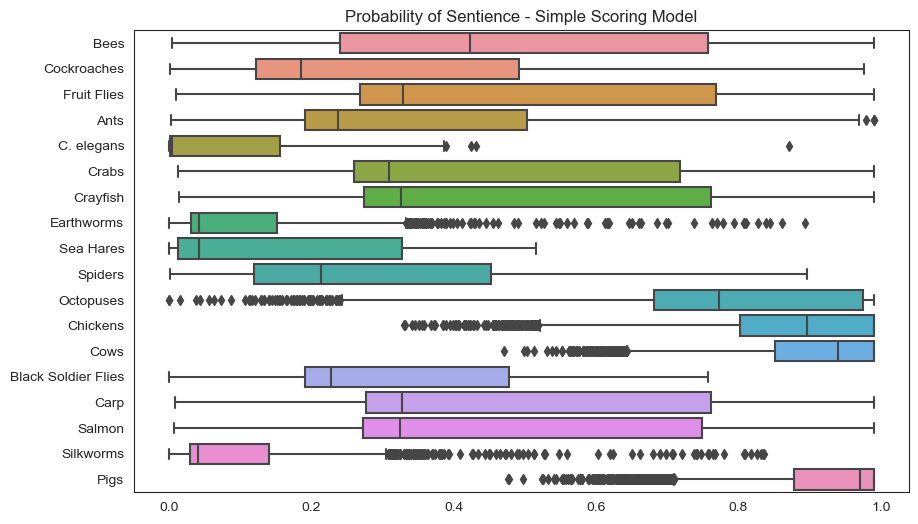

In [8]:
# simple scoring function
def ss_f(sentience_sum):
    adjusted_sentience_sum = sentience_sum
    return adjusted_sentience_sum

ss_sent_stats, ss_sent_data = all_species_p_sentience_priors_based(ss_f, priors, "simple scoring", data, ss_proxies, to_plot=False)
print("Simple Scoring Model:")
print(ss_sent_stats)
box_plot_adj_wr("Simple Scoring", ss_sent_data, showfliers=True)

### #1 High Value Proxies 


#1 High-Value Proxies Model:
             5th-pct  50th-pct  95th-pct
pigs           0.735     0.976     0.990
cows           0.713     0.944     0.990
chickens       0.624     0.902     0.990
octopuses      0.426     0.773     0.990
bees           0.040     0.423     0.903
fruit_flies    0.071     0.330     0.919
carp           0.082     0.328     0.913
crayfish       0.083     0.327     0.909
salmon         0.081     0.327     0.907
crabs          0.078     0.307     0.855
ants           0.035     0.234     0.581
bsf            0.078     0.221     0.576
spiders        0.017     0.208     0.519
cockroaches    0.018     0.183     0.565
earthworms     0.002     0.041     0.248
sea_hares      0.002     0.041     0.386
silkworms      0.002     0.039     0.237
c_elegans      0.000     0.004     0.268


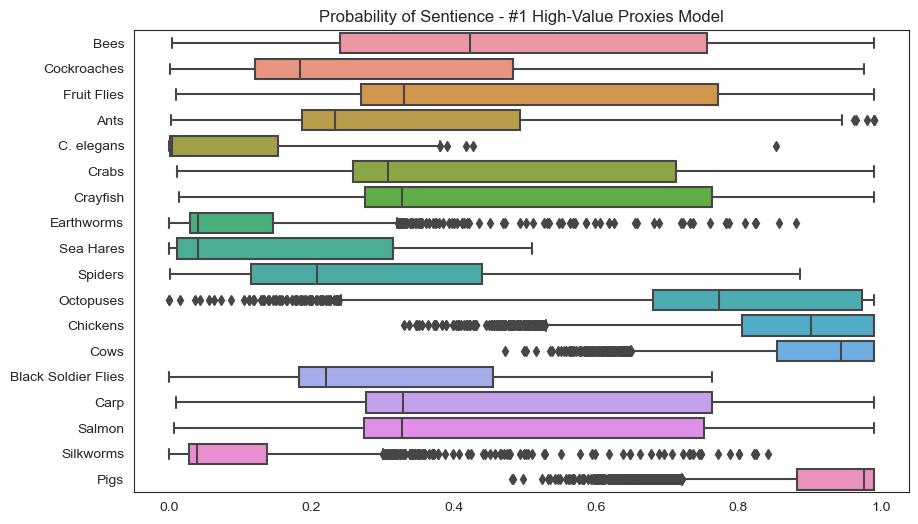

In [9]:
#1_High-Value Proxies Function
def hv1_f(sentience_sum):
    adjusted_sentience_sum = sentience_sum
    return adjusted_sentience_sum

hv1_sent_stats, hv1_sent_data = all_species_p_sentience_priors_based(hv1_f, priors, "#1_high value proxies", data, hv1_proxies, to_plot=False)
print("#1 High-Value Proxies Model:")
print(hv1_sent_stats)
box_plot_adj_wr("#1 High-Value Proxies", hv1_sent_data)

## Martina's High-Value Proxies

Martina's High-Value Proxies Model:
             5th-pct  50th-pct  95th-pct
pigs           0.736     0.978     0.990
cows           0.715     0.946     0.990
chickens       0.625     0.904     0.990
octopuses      0.427     0.775     0.990
bees           0.040     0.424     0.905
fruit_flies    0.072     0.331     0.921
carp           0.082     0.329     0.915
crayfish       0.083     0.328     0.911
salmon         0.081     0.328     0.910
crabs          0.078     0.308     0.858
ants           0.035     0.235     0.583
bsf            0.084     0.223     0.581
spiders        0.017     0.209     0.523
cockroaches    0.018     0.184     0.567
earthworms     0.002     0.041     0.250
sea_hares      0.002     0.041     0.389
silkworms      0.002     0.039     0.238
c_elegans      0.000     0.004     0.269


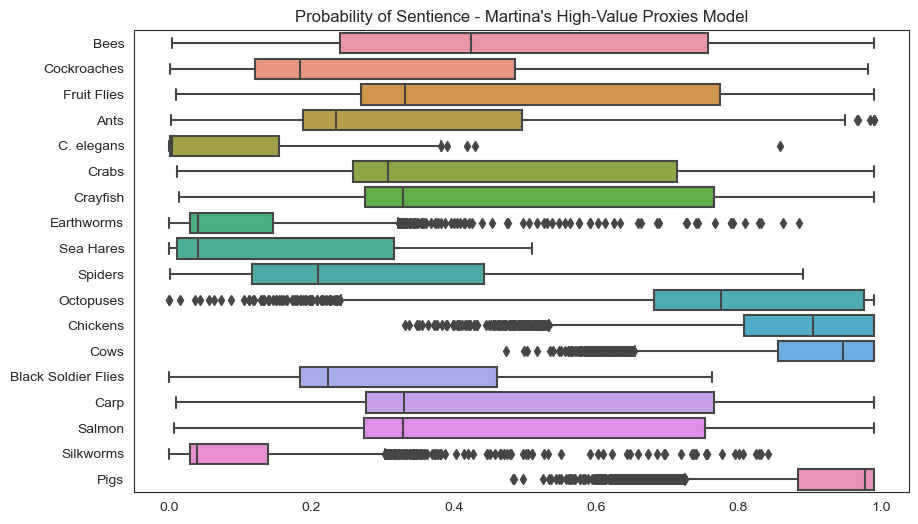

In [10]:
hvm_sent_stats, hvm_sent_data = all_species_p_sentience_priors_based(ss_f, priors, "Martina's High-Value Proxies", data, hvm_proxies, to_plot=False)
print("Martina's High-Value Proxies Model:")
print(hvm_sent_stats)
box_plot_adj_wr("Martina's High-Value Proxies", hvm_sent_data)

## Anna's High-Value Proxies

Anna's High-Value Proxies Model:
             5th-pct  50th-pct  95th-pct
pigs           0.734     0.975     0.990
cows           0.711     0.941     0.990
chickens       0.622     0.900     0.990
octopuses      0.426     0.774     0.990
bees           0.040     0.423     0.900
fruit_flies    0.071     0.329     0.916
carp           0.082     0.328     0.911
crayfish       0.082     0.326     0.906
salmon         0.080     0.326     0.905
crabs          0.078     0.307     0.855
ants           0.035     0.235     0.583
bsf            0.078     0.220     0.574
spiders        0.017     0.208     0.519
cockroaches    0.017     0.183     0.563
earthworms     0.002     0.041     0.248
sea_hares      0.002     0.040     0.385
silkworms      0.002     0.039     0.236
c_elegans      0.000     0.004     0.267


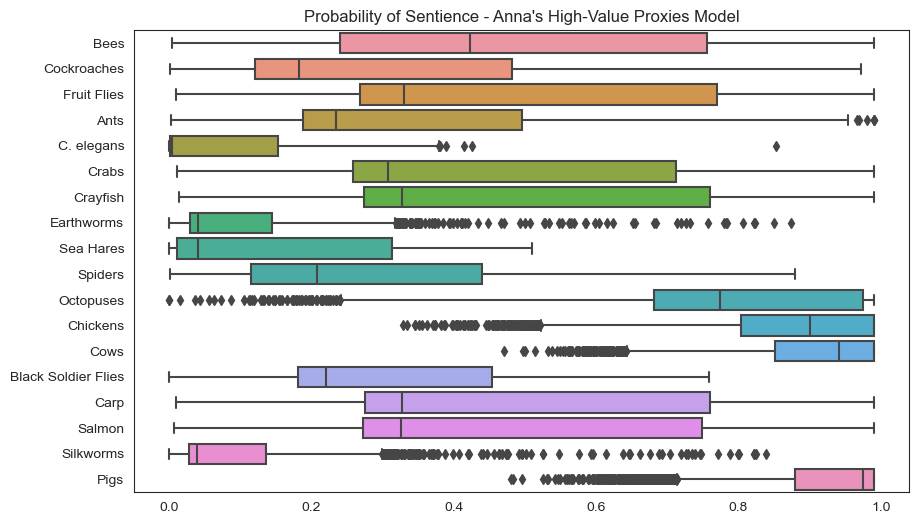

In [11]:
hva_sent_stats, hva_sent_data = all_species_p_sentience_priors_based(ss_f, priors, "Anna's High-Value Proxies", data, hva_proxies, to_plot=False)
print("Anna's High-Value Proxies Model:")
print(hva_sent_stats)
box_plot_adj_wr("Anna's High-Value Proxies", hva_sent_data)

## Birch Model

rm -rf birch_estimates
mkdir birch_estimates
Birch Model Sentience Estimates
             5th-pct  50th-pct  95th-pct
pigs           0.730     0.969     0.990
cows           0.704     0.931     0.990
chickens       0.612     0.888     0.990
octopuses      0.417     0.756     0.990
bees           0.039     0.410     0.874
carp           0.082     0.327     0.911
fruit_flies    0.071     0.326     0.907
salmon         0.080     0.323     0.897
crayfish       0.082     0.321     0.893
crabs          0.078     0.305     0.849
bsf            0.081     0.220     0.575
ants           0.032     0.209     0.520
spiders        0.016     0.194     0.487
cockroaches    0.017     0.180     0.553
earthworms     0.002     0.042     0.256
sea_hares      0.002     0.042     0.401
silkworms      0.002     0.039     0.234
c_elegans      0.000     0.004     0.271


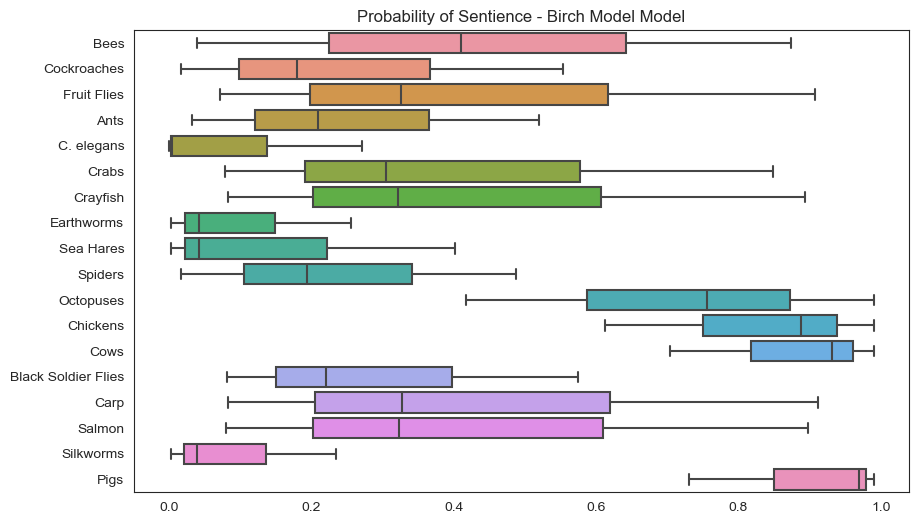

In [12]:
import platform
import os

def run_cmd(cmd):
    print(cmd)
    os.system(cmd)

if platform.system() == 'Darwin' or platform.system() == 'Linux':
    run_cmd('rm -rf birch_estimates')
    run_cmd('mkdir birch_estimates')

elif platform.system() == 'Windows':
    run_cmd('rmdir /Q /S birch_estimates')
    run_cmd('mkdir birch_estimates')

birch_proxies = pd.read_csv(os.path.join('input_data', 'Birch Model Proxies.csv'))

def get_overlap(criterion_proxies, species_scores):
    criterion_scores = {}
    for proxy in criterion_proxies:
        criterion_scores[proxy] = species_scores[proxy]

    return criterion_scores

def one_species_birch_sum(birch_proxies, species_scores):
    birch_sums = {}
    for criterion in birch_proxies.columns:
        birch_sums[criterion] = []
        criterion_proxies = birch_proxies[criterion].dropna().values.tolist()
        criterion_scores = get_overlap(criterion_proxies, species_scores)

        for i in range(NUM_SCENARIOS):
            criterion_sum_i = 0
            for proxy in criterion_scores:
                crit_score_i = criterion_scores[proxy][i]
                criterion_sum_i += crit_score_i
        
            birch_sums[criterion].append(criterion_sum_i)

    return birch_sums

def one_species_birch_est(priors, birch_proxies, species_scores, species):
    so_birch_sums = one_species_birch_sum(birch_proxies, sometimes_operates_scores)
    species_birch_sums = one_species_birch_sum(birch_proxies, species_scores)
    
    species_birch_scores = {}

    fifth_percentiles = []
    medians = []
    ninty_fifth_percentiles = []
    criteria = ['overall'] 

    overall_scores = []
    for i in range(NUM_SCENARIOS):
        prior = priors[species][i]
        score_i = 0
        so_score_i = 0
        for c in species_birch_sums:
            score_i += species_birch_sums[c][i]
            so_score_i += so_birch_sums[c][i]
        posterior = min(prior*(score_i/(so_score_i))**0.25,0.99)
        posterior = max(posterior,0)
        overall_scores.append(posterior)
    overall_birch_array = np.array(overall_scores)
    overall_birch_percentiles = np.percentile(overall_birch_array, SCENARIO_RANGES)

    fifth_percentile = overall_birch_percentiles[1]
    ninty_fifth_percentile = overall_birch_percentiles[11]
    median = overall_birch_percentiles[6]

    fifth_percentiles.append(round(fifth_percentile,3))
    medians.append(round(median,3))
    ninty_fifth_percentiles.append(round(ninty_fifth_percentile,3))

    for criterion in species_birch_sums:
        criteria.append(criterion)
        species_birch_scores[criterion] = []
        crit_list = species_birch_sums[criterion]
        for i in range(len(crit_list)):
            species_birch_scores[criterion].append(species_birch_sums[criterion][i])
        
        criterion_birch_array = np.array(species_birch_scores[criterion])
        criterion_birch_percentiles = np.percentile(criterion_birch_array, SCENARIO_RANGES)

        fifth_percentile = criterion_birch_percentiles[1]
        ninty_fifth_percentile = criterion_birch_percentiles[11]
        median = criterion_birch_percentiles[6]

        fifth_percentiles.append(round(fifth_percentile,3))
        medians.append(round(median,3))
        ninty_fifth_percentiles.append(round(ninty_fifth_percentile,3))

    cols = ["5th-pct", "50th-pct", "95th-pct"]
    crit = species_birch_scores.keys()
    birch_sentience_stats_df = pd.DataFrame(list(zip(fifth_percentiles, medians, ninty_fifth_percentiles)), \
        columns=cols, index=criteria)
        
    return birch_sentience_stats_df

def all_species_birch_est():
    fifth_pctiles = []
    med_pctiles = []
    ninetyfifth_pctiles = []
    species_sent_data = []

    for species in species_lst:
        species_scores = data[species]['Scores']
        spec_birch_est = one_species_birch_est(priors, birch_proxies, species_scores, species)
        path = os.path.join('birch_estimates', "{}_birch_estimates.csv".format(species))
        spec_birch_est.to_csv(path, index_label="Species")
        spec_overall = spec_birch_est.loc[['overall']]
        species_sent_data.append(spec_overall)
        fifth_pctiles.append(spec_overall['5th-pct'].values[0])
        med_pctiles.append(spec_overall['50th-pct'].values[0])
        ninetyfifth_pctiles.append(spec_overall['95th-pct'].values[0])
        
    birch_overalls = pd.DataFrame(list(zip(fifth_pctiles, med_pctiles, ninetyfifth_pctiles)), \
        columns=['5th-pct', '50th-pct', '95th-pct'],index=species_lst)
    birch_overalls = birch_overalls.sort_values("50th-pct", ascending=False)
    path = os.path.join('sentience_estimates', "Sent {} Summary Statistics.csv".format("Birch Model"))
    birch_overalls.to_csv(path, index_label="Species")
    return birch_overalls, species_sent_data

birch_overalls, birch_sent_data = all_species_birch_est()
print("Birch Model Sentience Estimates")
print(birch_overalls)
box_plot_adj_wr("Birch Model", birch_sent_data)


## Tests 

In [13]:
import unittest

proxies = {'simple scoring': {'List': ss_proxies_lst, 'Set': ss_proxies}, 
            '#1_high value proxies': {'List': hv1_proxies_lst, 'Set': hv1_proxies}, 
            '#1 pleasure and pain centric model': {"List": pp_proxies_lst, 'Set': pp_proxies},
            'high value proxies_anna': {"List": hva_proxies_lst, 'Set': hva_proxies}, 
            'high value proxies_martina': {'List': hvm_proxies_lst, 'Set': hvm_proxies}}

models = {'Simple Scoring': {'Proxies': ss_proxies, 'Function': ss_f},
        '#1 High-Value Proxies': {'Proxies': hv1_proxies, 'Function': hv1_f},
        "Martina's High-Value Proxies": {'Proxies': hvm_proxies, 'Function': ss_f}, 
        "Anna's High-Value Proxies": {'Proxies': hva_proxies, 'Function': ss_f}}   

class TestSimpleFunctions(unittest.TestCase):

    def test_proxies(self):
        pass_test = True
        for model in proxies:
            if set(proxies[model]['List']) != proxies[model]['Set']:
                pass_test = False
        self.assertTrue(pass_test)

    def test_get_sum(self):
        pass_test = True
        for x in [0,1]:  
            for model in proxies:
                test_data = {}
                model_proxies = proxies[model]['Set']
                for proxy in model_proxies:
                    test_data[proxy] = [x]*NUM_SCENARIOS
                for i in range(NUM_SCENARIOS):
                    expected = x*len(model_proxies)
                    actual = get_sum(test_data, i)
                    if expected != actual:
                        pass_test = False
        self.assertTrue(pass_test)

    def test_one_sim_p_sent_priors_based(self):
        pass_test = True
        fake_so_scores = {}
        fake_priors = {'pigs': np.array([0.5]*NUM_SCENARIOS)}
        for proxy in ss_proxies:
            fake_so_scores[proxy] = [1]*NUM_SCENARIOS
        for x in [0, 1]:
            test_scores = {}
            for proxy in ss_proxies:
                test_scores[proxy] = [x]*NUM_SCENARIOS
            for model in models:
                model_proxies = models[model]['Proxies']
                f = models[model]['Function']
                prediction = 0.5*(f(x)/f(1))**0.25
                for i in range(NUM_SCENARIOS):
                    p = one_sim_p_sentience_priors_based(f, fake_priors, species, model_proxies, test_scores, fake_so_scores, i)
                    if p != prediction:
                        pass_test = False
                        print("prediction: {}".format(prediction))
                        print("p: {}".format(p))
        self.assertTrue(pass_test)

birch_proxies_dict = {"1: possession of nociceptors": ['physiological responses to nociception or handling', \
                                                        'nociception', 'nociception (strict definition)', \
                                                        'noxious stimuli related vocalizations', 'movement away from noxious stimuli'],
                    "2: possession of integrative brain regions": ['centralized information processing', \
                                                        'vertebrate midbrain-like function'],
                    "3: possession of neural pathways connecting nociceptiorrs to brain regions": ['taste aversion behavior', \
                                                        'pain relief learning', 'long-term behavior alteration to avoid noxious stimulus (24+ hours)', \
                                                        'long-term behavior alteration to avoid noxious stimuli (30+ days)'], 
                    "4: behavioural response modulated by chemical compounds": ['affected by analgesics in a manner similar to humans', \
                                                        'opioid-like receptors', 'affected by recreational drugs in a similar manner to humans', \
                                                        'affected by antidepressants or anxiolytics in a similar manner to humans'], 
                    '5: evidence of motivational trade-offs': ['paying a cost to receive a reward', 'paying a cost to avoid a noxious stimulus', \
                                                        'self-control', 'predator avoidance tradeoffs', 'selective attention to noxious stimuli over other concurrent events'], 
                    "6: flexible self-protective behaviour": ['protective behavior', 'defensive behavior/fighting back'], 
                    "7: evidence of associative learning": ['classical conditioning', 'operant conditioning', 'operant conditioning with unfamiliar action', \
                                                        'contextual learning', 'observational or social learning', 'taste aversion behavior', 'pain relief learning', \
                                                        'long-term behavior alteration to avoid noxious stimulus (24+ hours)', 'long-term behavior alteration to avoid noxious stimuli (30+ days)'],
                    "8: evidence that the animal values a putative analgesic/anaesthetic when injured": ['self-administers analgesics', 'self-administers recreational drugs'], 
                    "9: evidence of affective states": ["anhedonia behavior", "learned helplessness behavior", 'displacement behavior', 'adverse effects of social isolation', \
                                                        'stereotypic behavior', 'fear/anxiety behavior', 'play behavior']}

class BirchModelTests(unittest.TestCase):
    def test_proxies(self):
        birch_proxies = pd.read_csv(os.path.join('input_data', 'Birch Model Proxies.csv'))
        pass_test = True
        for criterion in birch_proxies.columns:
            criterion_proxies = birch_proxies[criterion].dropna().values.tolist()
            if set(criterion_proxies) != set(birch_proxies_dict[criterion]):
                pass_test = False
                print("Failed at {}".format(criterion))
                print("Hard-coded proxies:", birch_proxies_dict[criterion])
                print("Downloaded proxies:", criterion_proxies)
        self.assertTrue(pass_test)

    def test_one_species_birch_sum(self):
        pass_test = True
        birch_sums_2 = {}
        
        for x in [0,1]:
            test_all_scores = {}
            for proxy in ss_proxies:
                if proxy in hv1_proxies:
                    test_all_scores[proxy] = [x*HC_WEIGHT]*NUM_SCENARIOS
                else:
                    test_all_scores[proxy] = [x]*NUM_SCENARIOS

            for criterion, lst in birch_proxies_dict.items():
                test_data = {}
                for proxy in lst:
                    if proxy in hv1_proxies:
                        test_data[proxy] = [x*HC_WEIGHT]*NUM_SCENARIOS
                    else:
                        test_data[proxy] = [x]*NUM_SCENARIOS
                birch_sums = one_species_birch_sum(birch_proxies, test_all_scores)
                prediction = sum([test_data[proxy][0] for proxy in test_data.keys()])
                for i in range(NUM_SCENARIOS):
                    p = birch_sums[criterion][i]
                    if p != prediction:
                        pass_test = False
                        print("Failed on: ")
                        print("x = {}".format(x))
                        print("Criterion: ", criterion)
                        print("prediction: ", prediction)
                        print("p:", p)

        self.assertTrue(pass_test)

    def test_one_species_birch_est(self):
        pass_test = True
        for x in [0,1]:
            human_all_scores = {}
            species_all_scores = {}
            for proxy in ss_proxies:
                if proxy in hv1_proxies:
                    human_all_scores[proxy] = [1*HC_WEIGHT]*NUM_SCENARIOS
                    species_all_scores[proxy] = [x*HC_WEIGHT]*NUM_SCENARIOS
                else:
                    human_all_scores[proxy] = [1]*NUM_SCENARIOS
                    species_all_scores[proxy] = [x]*NUM_SCENARIOS
            species_sum = 0
            human_sum = 0
            for lst in birch_proxies_dict.values():
                for proxy in lst:
                    species_sum += species_all_scores[proxy][0]
                    human_sum += human_all_scores[proxy][0]
            prediction = species_sum/human_sum
            # function
            human_birch_sums = one_species_birch_sum(birch_proxies, human_all_scores)
            species_birch_sums = one_species_birch_sum(birch_proxies, species_all_scores)

            overall_scores = []
            for i in range(NUM_SCENARIOS):
                score_i = 0
                hum_score_i = 0
                for c in species_birch_sums:
                    score_i += species_birch_sums[c][i]
                    hum_score_i += human_birch_sums[c][i]
                overall_scores.append(score_i/hum_score_i)

            for i in range(NUM_SCENARIOS):
                if overall_scores[i] != prediction:
                    pass_test = False
                    print("Failed at:")
                    print("x: ", x)
                    print("prediction: ", prediction)
                    print("p: ", overall_scores[i])
        self.assertTrue(pass_test)


res2 = unittest.main(argv=[''], verbosity=3, exit=False)


test_one_species_birch_est (__main__.BirchModelTests) ... ok
test_one_species_birch_sum (__main__.BirchModelTests) ... ok
test_proxies (__main__.BirchModelTests) ... ok
test_get_sum (__main__.TestSimpleFunctions) ... ok
test_one_sim_p_sent_priors_based (__main__.TestSimpleFunctions) ... ok
test_proxies (__main__.TestSimpleFunctions) ... ok

----------------------------------------------------------------------
Ran 6 tests in 2.270s

OK
